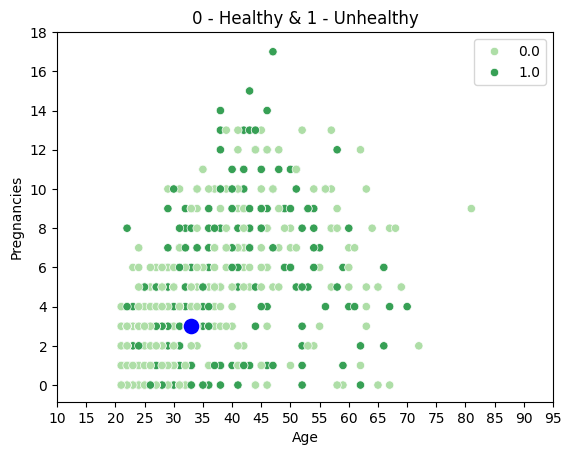

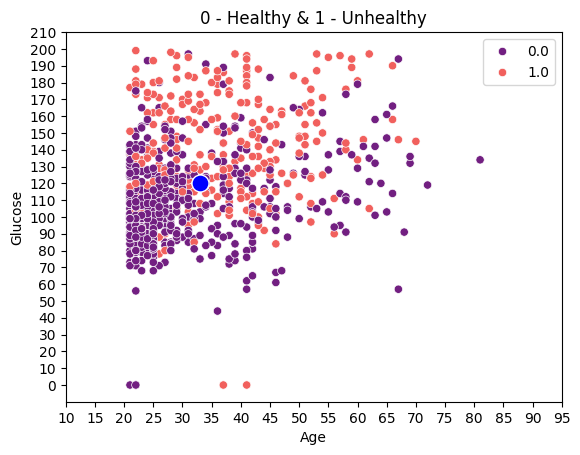

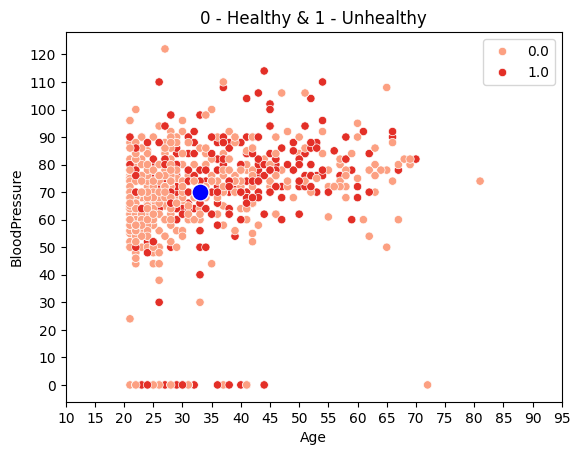

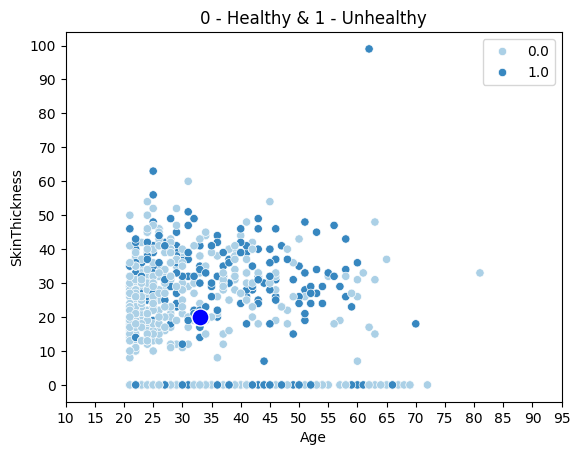

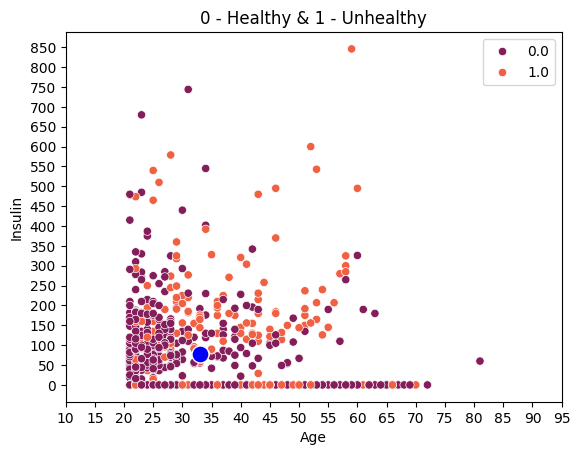

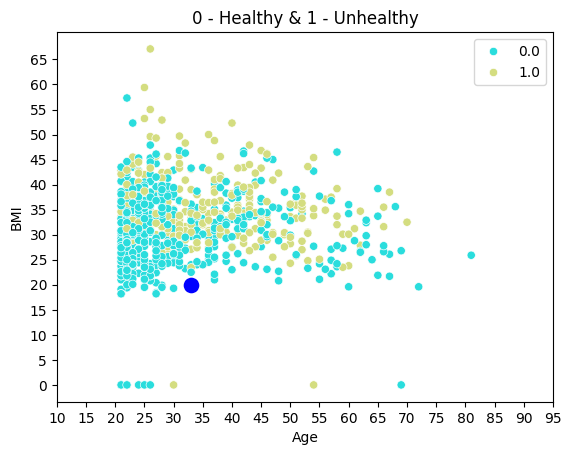

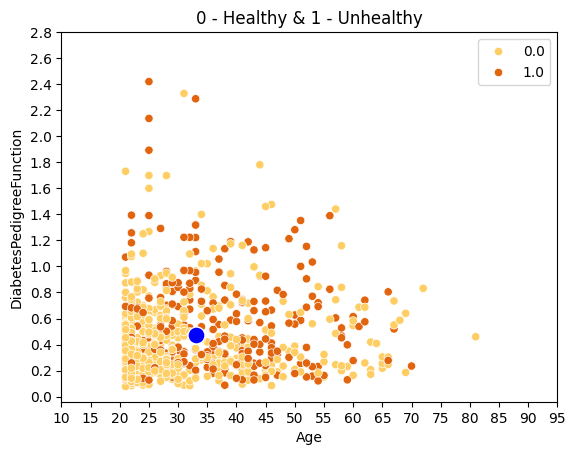

In [11]:
#pip install streamlit
#pip install pandas
#pip install sklearn


# IMPORT STATEMENTS
import streamlit as st
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns



df = pd.read_csv("diabetes.csv")
df=df.dropna(how="all")

# HEADINGS
st.title('Diabetes Checkup')
st.sidebar.header('Patient Data')
st.subheader('Training Data Stats')
st.write(df.describe())


# X AND Y DATA
x = df.drop(['Outcome'], axis = 1)
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)


# FUNCTION
def user_report():
  pregnancies = st.sidebar.slider('Pregnancies', 0,17, 3 )
  glucose = st.sidebar.slider('Glucose', 0,200, 120 )
  bp = st.sidebar.slider('Blood Pressure', 0,122, 70 )
  skinthickness = st.sidebar.slider('Skin Thickness', 0,100, 20 )
  insulin = st.sidebar.slider('Insulin', 0,846, 79 )
  bmi = st.sidebar.slider('BMI', 0,67, 20 )
  dpf = st.sidebar.slider('Diabetes Pedigree Function', 0.0,2.4, 0.47 )
  age = st.sidebar.slider('Age', 21,88, 33 )

  user_report_data = {
      'Pregnancies':pregnancies,
      'Glucose':glucose,
      'BloodPressure':bp,
      'SkinThickness':skinthickness,
      'Insulin':insulin,
      'BMI':bmi,
      'DiabetesPedigreeFunction':dpf,
      'Age':age
  }
  report_data = pd.DataFrame(user_report_data, index=[0])
  return report_data




# PATIENT DATA
user_data = user_report()
st.subheader('Patient Data')
st.write(user_data)




# MODEL
rf  = RandomForestClassifier()
rf.fit(x_train, y_train)
user_result = rf.predict(user_data)



# VISUALISATIONS
st.title('Visualised Patient Report')



# COLOR FUNCTION
if user_result[0]==0:
  color = 'blue'
else:
  color = 'red'


# Age vs Pregnancies
st.header('Pregnancy count Graph (Others vs Yours)')
fig_preg = plt.figure()
ax1 = sns.scatterplot(x = 'Age', y = 'Pregnancies', data = df, hue = 'Outcome', palette = 'Greens')
ax2 = sns.scatterplot(x = user_data['Age'], y = user_data['Pregnancies'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,20,2))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_preg)



# Age vs Glucose
st.header('Glucose Value Graph (Others vs Yours)')
fig_glucose = plt.figure()
ax3 = sns.scatterplot(x = 'Age', y = 'Glucose', data = df, hue = 'Outcome' , palette='magma')
ax4 = sns.scatterplot(x = user_data['Age'], y = user_data['Glucose'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,220,10))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_glucose)



# Age vs Bp
st.header('Blood Pressure Value Graph (Others vs Yours)')
fig_bp = plt.figure()
ax5 = sns.scatterplot(x = 'Age', y = 'BloodPressure', data = df, hue = 'Outcome', palette='Reds')
ax6 = sns.scatterplot(x = user_data['Age'], y = user_data['BloodPressure'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,130,10))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_bp)


# Age vs St
st.header('Skin Thickness Value Graph (Others vs Yours)')
fig_st = plt.figure()
ax7 = sns.scatterplot(x = 'Age', y = 'SkinThickness', data = df, hue = 'Outcome', palette='Blues')
ax8 = sns.scatterplot(x = user_data['Age'], y = user_data['SkinThickness'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,110,10))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_st)


# Age vs Insulin
st.header('Insulin Value Graph (Others vs Yours)')
fig_i = plt.figure()
ax9 = sns.scatterplot(x = 'Age', y = 'Insulin', data = df, hue = 'Outcome', palette='rocket')
ax10 = sns.scatterplot(x = user_data['Age'], y = user_data['Insulin'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,900,50))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_i)


# Age vs BMI
st.header('BMI Value Graph (Others vs Yours)')
fig_bmi = plt.figure()
ax11 = sns.scatterplot(x = 'Age', y = 'BMI', data = df, hue = 'Outcome', palette='rainbow')
ax12 = sns.scatterplot(x = user_data['Age'], y = user_data['BMI'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,70,5))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_bmi)


# Age vs Dpf
st.header('DPF Value Graph (Others vs Yours)')
fig_dpf = plt.figure()
ax13 = sns.scatterplot(x = 'Age', y = 'DiabetesPedigreeFunction', data = df, hue = 'Outcome', palette='YlOrBr')
ax14 = sns.scatterplot(x = user_data['Age'], y = user_data['DiabetesPedigreeFunction'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,3,0.2))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_dpf)



# OUTPUT
st.subheader('Your Report: ')
output=''
if user_result[0]==0:
  output = 'You are not Diabetic'
else:
  output = 'You are Diabetic'
st.title(output)
st.subheader('Accuracy: ')
st.write(str(accuracy_score(y_test, rf.predict(x_test))*100)+'%')